# Solution to a nonhomogeneous 2nd order ODE using CDM

Solve
    $$-u''(x) + 2u(x) = x, x \in (0, 1), \\
    u'(0) = u'(1) = 0$$
by means of the finite difference method with number of subintervals
n = 50.

---

Discretizing for 2nd order accuracy:

The general equation
    $$-\frac{p}{h^2} \cdot u_{i+1} + \bigg( \frac{2p}{h^2} + q \bigg) u_i - \frac{p}{h^2} \cdot u_{i-1} = f(x).$$

---

Now the left and rightside boundary condition:
    $$u'(\pi) = \frac{u_{i+1}(\pi) - u_{i-1}(\pi)}{2 \cdot h}$$

Shifting a bit
    $$u'(\pi) = \frac{u_{i+2}(\pi) - u_{i}(\pi)}{2 \cdot h}$$

Substituting i for 0 we get (keep in mind that for Python $i = 0, 1, 2, ... $)
    $$A_{0,0} = -\frac{1}{2 \cdot h} \quad A_{0,2} = -\frac{1}{2 \cdot h}$$    

Substituting i for n (for some reason) we get 
    $$A_{n+2, n} = \frac{1}{2 \cdot h} \quad A_{n+2,n+2} = \frac{1}{2 \cdot h}$$
    
---

All of this in matrix notation:
$$ \begin{bmatrix} -\frac{1}{2 \cdot h} & 0 & \frac{1}{2 \cdot h} & ... & 0\\ - \frac{p}{h^2} & \bigg( \frac{2p}{h^2} + q \bigg) & - \frac{p}{h^2} & ... & 0 \\ ...& ... &  - \frac{p}{h^2} & \bigg( \frac{2p}{h^2} + q \bigg) & - \frac{p}{h^2}\\0& ... &  -\frac{1}{2 \cdot h} & 0 & \frac{1}{2 \cdot h} \\ \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \\ ... \\ u_{N+3} \end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \\ ... \\x_{N+3} \end{bmatrix} $$

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:

L = 1
a = 0
b = 0
p = 1
q = 2
f = lambda x: x
n = 50

h = L/n
x = np.linspace(0, L, n+3)

In [28]:
A = np.zeros((n+3, n+3))
y = np.zeros(n+3)
A[0, 0] = -1/(2*h)
A[0, 2] =  1/(2*h)
y[0] = a
for i in range(1, n+2):
    A[i, i-1] = -p/h**2
    A[i, i]   =  2*p/h**2 + q
    A[i, i+1] = -p/h**2
    y[i] = f(x[i])
A[n+2, n  ] = -1/(2*h)
A[n+2, n+2] = 1/(2*h)
y[n+2] = b

In [32]:
print("The lower right corner elements of matrix A:")
n = len(A)
for i in range(n-5, n):
    for j in np.arange(n-5, n):
        print(f"{A[i][j]:.10f}", end='\t')
    print()

The lower right corner elements of matrix A:
5002.0000000000	-2500.0000000000	0.0000000000	0.0000000000	0.0000000000	
-2500.0000000000	5002.0000000000	-2500.0000000000	0.0000000000	0.0000000000	
0.0000000000	-2500.0000000000	5002.0000000000	-2500.0000000000	0.0000000000	
0.0000000000	0.0000000000	-2500.0000000000	5002.0000000000	-2500.0000000000	
0.0000000000	0.0000000000	-25.0000000000	0.0000000000	25.0000000000	


In [30]:
u = np.linalg.solve(A, y)

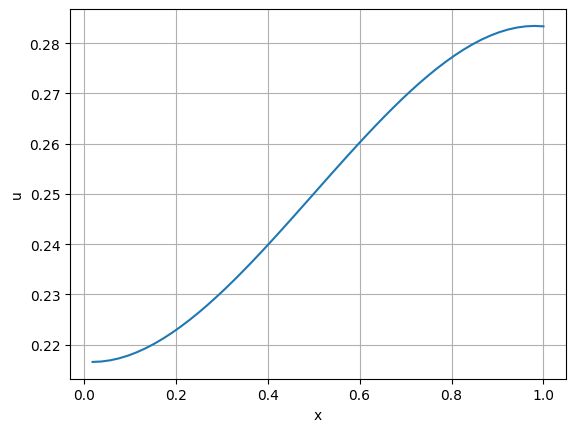

In [31]:
plt.plot(x[1:n+2], u[1:n+2])
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()